## 5. Phenotypic Phase plane analysis

We utilized a production envelope strategy(PPP) to show distinct phases of optimal growth with different use of two different substrates.
In our scenario, we use PPP in order to asses the optimal growth of A.niger when producing Oxalic acid when employing glucose and oxygen as exchange reactions.
Here, our PPP analysis are plotted for:

    - Biomass as a function of oxalic acid exchange reaction
    
    - Exchange reaction of oxalic acid as a function of glucose uptake
    
    - Oxalic acid production as a function of oxygen exchange reaction
    
All plots are under aerobic conditions as A.niger is an aerobic microorganism. 

In [5]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope
from cobra.io import read_sbml_model

'' is not a valid SBML 'SId'.


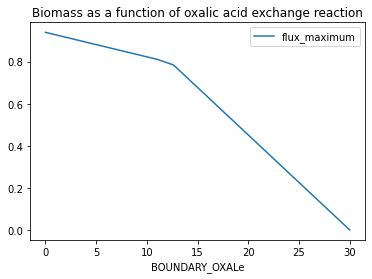

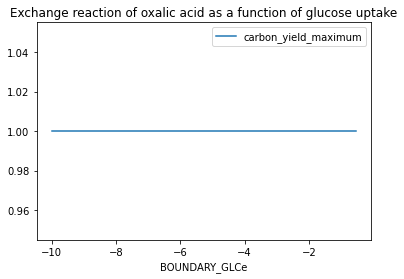

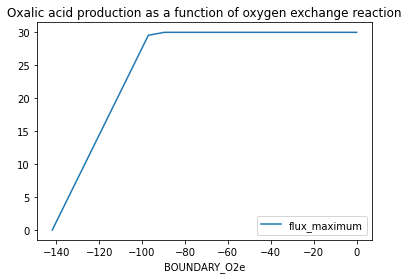

In [7]:
model = read_sbml_model("Model_iJB1325_ATCC1015.xml")
medium = model.medium
with model:
    model.medium = medium
    model.objective = model.reactions.get_by_id("BOUNDARY_OXALe")
    oxal_production = model.optimize().objective_value
    Biomass_ppp = production_envelope(model,
                    reactions=[model.reactions.get_by_id("BOUNDARY_OXALe")],
                    objective=model.reactions.DRAIN_Biomass)
    Oxal_ppp = production_envelope(model,
                    reactions=[model.reactions.get_by_id("BOUNDARY_GLCe")],
                    objective=model.reactions.get_by_id("BOUNDARY_OXALe"))
    O2_ppp = production_envelope(model,
                    reactions=[model.reactions.get_by_id("BOUNDARY_O2e")],
                    objective=model.reactions.get_by_id("BOUNDARY_OXALe"))

    Biomass_ppp.plot(x='BOUNDARY_OXALe', y='flux_maximum', title = 'Biomass as a function of oxalic acid exchange reaction' ) 
    Oxal_ppp.plot(x='BOUNDARY_GLCe', y='carbon_yield_maximum', title = 'Exchange reaction of oxalic acid as a function of glucose uptake') 
    O2_ppp.plot(x='BOUNDARY_O2e', y='flux_maximum', title = 'Oxalic acid production as a function of oxygen exchange reaction')

Analysing the above plots we can argue that both biomass and oxalic acid production have a somewhat nearly linear relationship. This could mean that Oxalic acid is probably produced from the carbon source (sucrose) but at the expense of biomass production.In additon, we can observe that Oxalic acid production not aftected by the glucose concentrations.